In [74]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.preprocessing.image import img_to_array
from keras.applications import imagenet_utils

import pandas as pd
import numpy as np
from PIL import Image
import urllib.request
import io

In [4]:
def load_model():
    # load the pre-trained Keras model (here we are using a model
    # pre-trained on ImageNet and provided by Keras, but you can
    # substitute in your own networks just as easily)
    global model
    model = ResNet50(weights="imagenet")

In [42]:
def prepare_image(image, target):
    # if the image mode is not RGB, convert it
    if image.mode != "RGB":
        image = image.convert("RGB")

    # resize the input image and preprocess it
    image = image.resize(target)
    print (type(image))
    
    image = img_to_array(image)
    print (type(image), image.shape)
    
    image = np.expand_dims(image, axis=0)
    print (type(image), image.shape)
    
    image = imagenet_utils.preprocess_input(image)
    print (type(image), image.shape)

    # return the processed image
    return image

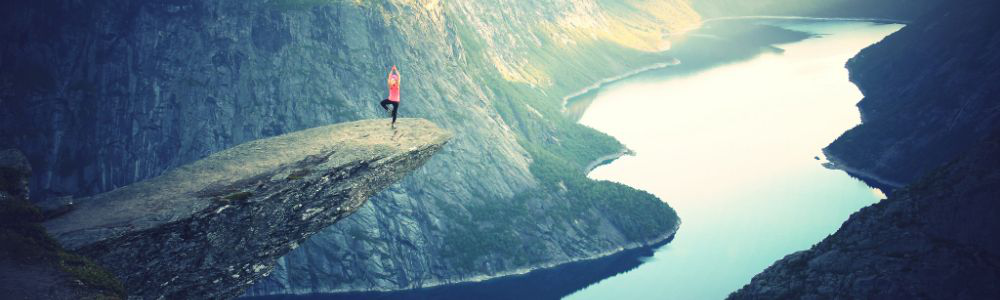

In [43]:
URL = 'http://www.w3schools.com/css/trolltunga.jpg'

with urllib.request.urlopen(URL) as url:
    f = io.BytesIO(url.read())

img = Image.open(f)

img

In [44]:
len(img.tobytes()), type(img.tobytes()), img.size, img.format

(900000, bytes, (1000, 300), 'JPEG')

In [45]:
# img_path = 'http://iridescent.date/static/phos/profile_sub_92/26_151252_1.jpg'
# img = image.load_img(img_path, target_size=(224, 224))

img2 = prepare_image(img, target=(224, 224))


<class 'PIL.Image.Image'>
<class 'numpy.ndarray'> (224, 224, 3)
<class 'numpy.ndarray'> (1, 224, 224, 3)
<class 'numpy.ndarray'> (1, 224, 224, 3)


In [46]:
type(img2), img2.shape, img2[0].shape

(numpy.ndarray, (1, 224, 224, 3), (224, 224, 3))

In [50]:
np.vstack([img2, img2]).shape

(2, 224, 224, 3)

In [77]:
%%time
preds = model.predict(img2)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
res = decode_predictions(preds, top=10)[0]
print(type(res))
df = pd.DataFrame(res, columns=['id','label','prob'])[['label', 'prob']]

<class 'list'>
CPU times: user 1.23 s, sys: 184 ms, total: 1.41 s
Wall time: 78.7 ms


In [78]:
df

,label,prob
0,cliff,0.588138
1,alp,0.218196
2,promontory,0.033096
3,lacewing,0.029254
4,wreck,0.019019
5,valley,0.013737
6,lakeside,0.010940
7,leatherback_turtle,0.010823
8,cicada,0.005664
9,grey_whale,0.005351


In [168]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.preprocessing.image import img_to_array
from keras.applications import imagenet_utils

from time import time
import pandas as pd
import numpy as np
from PIL import Image
import urllib.request
import io

In [80]:
test = 'http://iridescent.date/static/phos/profile_sub_92/26_151252_1.jpg'


In [ ]:
%%time
preds = model.predict(img2)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
res = decode_predictions(preds, top=10)[0]
print(type(res))
df = pd.DataFrame(res, columns=['id','label','prob'])[['label', 'prob']]

In [169]:
class PredPic(object):
    start = time()
    cls_model = ResNet50(weights="imagenet")
    print ('load model {:.2f} s'.format(time()-start)) 
    
    def __init__(self, url, model=cls_model):
        self.model = model
        start = time()
        
        with urllib.request.urlopen(url) as fh:
            f = io.BytesIO(fh.read())
        self.img = Image.open(f)
        print ('load image {:.2f} s'.format(time()-start))
        start = time()
        
        self.main()
        print ('pred image {:.2f} s'.format(time()-start))
    
    
    def prepare_image(self, image, target=(224, 224)):
        # if the image mode is not RGB, convert it
        if image.mode != "RGB":
            image = image.convert("RGB")

        # resize the input image and preprocess it
        image = image.resize(target)
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0)
        image = imagenet_utils.preprocess_input(image)
        # return the processed image
        self.prepared = image
        return image
    
    def show(self):
        return self.img
    
    def result(self):
        return self.df
    
    def predict(self):
        preds = self.model.predict(self.prepared)
        # decode the results into a list of tuples (class, description, probability)
        # (one such list for each sample in the batch)
        res = decode_predictions(preds, top=10)[0]
        df = pd.DataFrame(res, columns=['id','label','prob'])[['label', 'prob']]
        df['prob'] = df['prob'].apply(lambda x: str(round(x*100,2)).ljust(5,'0')+'%')

        self.df = df
        return self.df
    
    def main(self):
        self.prepare_image(self.img)
        self.predict()



load model 4.49 s


In [156]:
test = 'http://iridescent.date/static/phos/sub_76/862392523.jpg'

In [157]:
a = PredPic(test)

load image 0.21 s
pred image 2.65 s


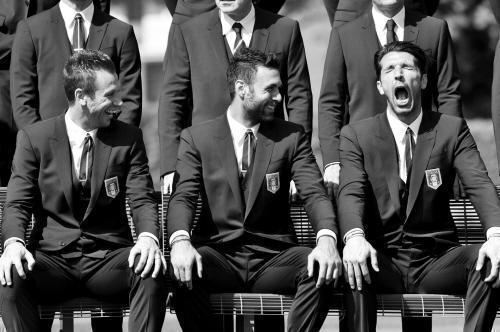

In [158]:
a.show()

In [159]:
a.result()

,label,prob
0,bow_tie,38.92%
1,umbrella,6.150%
2,suit,5.650%
3,rifle,4.680%
4,wardrobe,3.890%
5,sunglass,3.640%
6,military_uniform,2.530%
7,trench_coat,2.400%
8,picket_fence,1.840%
9,mortarboard,1.710%


In [160]:
test2 = 'http://iridescent.date/static/phos/sub_17/1380512085164_320x480.jpg'

In [161]:
b = PredPic(test2)

load image 0.14 s
pred image 0.93 s


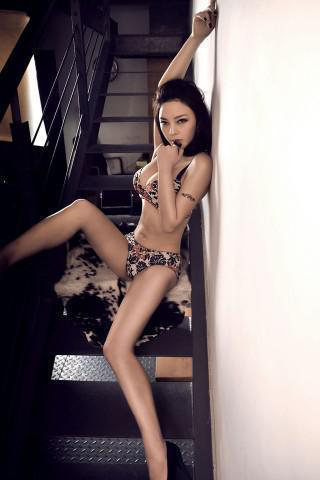

In [162]:
b.show()

In [163]:
b.result()

,label,prob
0,brassiere,39.15%
1,pole,23.18%
2,bikini,9.260%
3,maillot,5.800%
4,maillot,5.100%
5,punching_bag,2.000%
6,gown,1.620%
7,feather_boa,1.070%
8,miniskirt,0.830%
9,sarong,0.770%


In [170]:
test='data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBw4QEBAOEBAQEBASFxENCxgKCw8PEA0RIB0WIiAdHx8kKCgsJCYnJx8fLTEtJSkrLi4uFyszODMsNygtLisBCgoKDg0OGhAQGislHx0rLS0tLSstOC0rLSstOC01LS0tLTQtLSwtNy0rLSstLS0rLS0rLSstLS03LS00LS0tLf/AABEIAJMA3AMBIgACEQEDEQH/xAAcAAACAgMBAQAAAAAAAAAAAAADBAIFAAYHAQj/xAA7EAABAwIEBAQDBgUEAwEAAAABAgMRACEEEjFBBVFhcQYTIoEykbEHFEKhwfAjYoLR4TNScvEVQ5Ik/8QAGQEAAwEBAQAAAAAAAAAAAAAAAAECAwQF/8QAIxEBAQACAgMAAgIDAAAAAAAAAAECEQMhEjFBMlFhcQQTIv/aAAwDAQACEQMRAD8A6MU16BFeqNBUut2Tx1dYBUQKITFMkkWrHH40oKnOVBWQkKWo5UpBUonQCjQSWsmvUt1mEUhwZkGRobEEHqDcU0lFG58Ggg3XqRRSB+zQy4gSSQALmTAFLY0KlupoAFCaxrakylQULiUm0jWsDyedL2rQpNDePOpB5O1LvLnSiCguxtrtQUNxdVNBk1It86raNIsCmCval0FKd6wHN8IJ20pGiSZipC2tRLagRPanEcPcUJHtTtEivfXIgUuwxB51aL4Q8RYD50MYB1BlQ/On5QtFH2RExVU9AIrY1MKUIA7VUY3AEWIM608aWUKLX8qe4YNaUYwxUoIFWrGDUi09LU8qMYKVx+lVeJfBUaumsEs/FYbdakeGtb1EykO42hFwc6GXBXkchPaps4ZatBHekpAu8qyQe9NHAEXJoCEyYFGwXKF86U4+hRw60g6lAV2kf4q4GGVMUrxPCktuJmBEqOXNYEEiOoEe9Tnf+arH3Gr4HifljzB8MQ4PxSNQOvflVm5x/CpjPiWkFQCkh10IJBEg36Vow4kFqdSMgazlIkkrNogdO/Sq3iGGHpSoJWyEOhRU2VKOUSkAmw1MDuL1zzluN/itrxyuoK4phQnOcSyUmySjEIVmOwABknpSK8X56oT/AKQMmT6lxqSOVaHwnhTaHElGQENsuhYQSsOELgRoIEG2xHStqC/KZSpJSoJSEumcisxOscu53qc/8jy6+Hhw6/tbcCbWS/BhGcKTfSRp8gKvGgBpfvVZ4cWDhS7s4tSk5tbAA33uDTbLpJyjf8q6uLvCMOXrOrTDFJ9R7CirYBBUKHhWYgVYpAAiilFaG1bDtQ8RhlxmJgfWrRbiQQgamsxbWb0ijY0qeHYO+ZdyfhHKrJYQmydeQqCyW9R0FKsLKnJPtNO99j0niMOfiPtV9gh6EjpSiWwbm/KnMOsGoyu1SDEUlj05hA96cJpPFmL+1TDpLEu+WkCqDH4pSq2DFM+YmPlVDi8IU1thpnnt5wgjPJ7VeYlsJAVWsNLKTIrZcN/FRCtNo3oznYx9MOIGXNtVc5jzNhaiYrCKToSU6xVa88oE2iiSC1dYIApAHvVgw2BVLgnigwd9KvMMoRc3qcjxK42yTVfhr233qyxSM1KtMhJI96J6FMsNWNJYlRS28oa5HMmbQmDEz1pzBulRIGm/Wk+NGDlGh1onvQ+OF8K0hKVKhaUOhuAoLWQASTAEk67WHKrtK2XELbAW2r+A0Uu5AWVAOZViLELMz2vrXmJ4evDPKZbaKg4VpUgtlTGIZJkydjOl5BAjakQUt4tLqUFlt7KhfmPuPHOgEkSokgydJtXFnLN7+OnDV9NiTw1LOFYTmOY+aFSZW7ZCM0kiEpMCSY0A3rFvIyllwwtQU0G8UAFuLCoUBBIVzBBqeGa++ZcUEvfwkLwmGOEeLU+qVbEKkkWjUcxTbWGYvhnm1w2FeW04lwqkkkrzkXJJmZmZ7Vy27b61ReBcSbSBg1LShTZyspWuCpJuAOZF+tbLhlMtSpx1tG48x1CY661wLxY+FYxzyTlDcNNhCiMqouQZuZ3oAwKsyEqKlmJXnUTEbX616GHNccJK5cuKXK2O6P8AjnhbJ9WLZ3PoUVyBygGtd4h9sDE//lwzrybjO8oMpVyAFyZMa6VxvG6lKRYb87xt1mjleWDMgXQE7H9mnc6mYxvmK+1fGZrYVhJ1GZ9aj+VWPDPtrdbI+8YAKRupnEkKA6AiD865qlvMm5GY3JOgA5V4QcoETNiVbdhS86rxjufDfta4Ri1BCy7hFaD782gNq7KBIHvFbo3hUKulQIMH0KBB9xXyv92QokECelyTVt4X8XcQ4SpQw6gthRlxt9OZB7HUHqKqZ/CuD6TWUoOUEqO3SjsOSu3vyrUvBnjHCcSBUxmQ+BmxDbvxoHMHcdRV8tyFZQf5jFaa2zXizexpHFglYG2tLpxCiQlOm80TEqy6m+1EmjrMW9lSQi6um1a1j3nPxHtVwW1HTv3rHsClwQoT2q8bIjKWqHANFZk6TArbsG16BVTg+GJROUnncyKYU+pKgk2FGV36PGaOYv4TFVbeGBEk3Otqhj8WQmx1sb0TCPkIFElkLe6d+5pABPtUFry2FGcc5UHJJmpUmwVK10r1xEH61NtUfpQyd6AkSEaa9KTxg8yJ10piJ/SsbSJv3ohEcbwBt5vLdKx6mlAmUK59ulaTxXhSFIdwjmRtROZSizm8tzZaSIIPUcyNK6U4/sNNK1bxThSCnEJGYJhLwBiBsfY2qMp1tWPVTwGKabbaZyNo8gAM+SgpQE876HfnWseLOP5Q42kkuQVOEn/STzEag/OL0DiGPcUtOUpyCErAJkg6325VqOOxmZKbyVqKSTqGwbGOxjsBXBnd114TU219GGlaQkSZKlSd9T8hFOrX6idsijpdQB/f7FHaRm9YSY+G40TzJ60li3kpsbESnWJFVLuj1CGMRJcUNoiDpa35mooRHp/2pB/qNFYBJE6EpGuwJNeqBULarJmdYreMKWQSmdLADuTXnnH4I0uDp1M0Z5JJBEWmIP79zXjKEzCoyEFapMAkbf4qiN4JlJUnnllZOiBG9Zj20k5QBzkWKelEwZmYGYAhPpBlSo1g7RoKNjJTCEgZlXN4IO/tWF/JtPxU/Dse7hXkvMuKQ4gy2pByqbPIjQg8jau9eA/Eo4ggrUpHnpgPpbMTyUByPTQ1wt7CRJlKgfiAGaTz6GPpTvhnibuBxTWJbBITKnEIVHmNRKh8hPsK3wz1WeWO4+mkJy/Wllq8xeY6JsO9RwGNRim0OtHM2tKVtmIlJEi2x6UQjIADa8VvGNEbVJinA3a/tSJ9Pr/CLmaIjFhxKlJ0GhNge1KjbxTgTI2pHGyqCNN+goitADvtRS3AjbSqnRVQrOZcn4dKsE4ckcqk3w/KSdtYNNQO1Vcv0mY/tJHWiJEa0NbyU99qioKKSoDoazWl5wn6daxMm+1BA050RT4GvvTAyIqK7m350qXCTKSI1uaj5izp7xoKAdLfXvVZxpc4XFZR/wCtxPUmIn9aMCpZyz/80V1gfDPpIheYajcUBx57hTx9X3lRkAIC0yECLaXJiqTHhPmDKPQ2AgymSTv3rfOP4BxgkI0uGSLW5Tsdr7VpT+E8uASVSlR9Rk5tT3M79a4c8dZOnHLcBW4pLdjB+MWsUH/qte4i/mvuJy2irXHYlcWMj0iAPh79qpcdBSSmPTIUM23Oq48ddlyZbMYW8HT8VuZBpxTdwkbWJGwjUfmfekcEfSjndJ2zCLEfvnVgtCgBGuhKlWSOvsJq0E3QBeLG1tUo0A7k0VhnzEgRCUqypA/HGn5n8qgXASSlJWkyr0p3AtbYametSWlSlGVQbqbSlWpAvMdTR2DWGVlcAnK2CmMw9Rk6jSTNYsqIMk5lLUl2NYOgGmszUEHMAoiQjy1blKlwJjoCTT+Gw34DHqyKEESpyZM8pE23IOtTel40J8BQDcQRlUchO55m0CL0g/hLSAoiygMkg2sYNyCKtUNlVphRClumCQINrxpHe96TfZBEEwbFolREQbg9OQPOonVXXV/sh4mVYMsiSWFTBMw2biNwJmx51v2VLqZ1Mz3riv2V4xaMVkQpJLgWl3IMuYG8EbwRr7RXVgtZIiY5IECuvj7jmz6p3iDIUiyoA1GxpTBEKsTZOgTpUStSgRcgCDGgJqLAyJyAf8ida0+I+nnEBSQZvMQOVMB5Nk2tyqkxOOQykqdcQ03uXHAmABJrQ+I/azhW1FthlbyUyErUryvNM7TeKVs+qjqb+ISBmKgOguTSxxKFXAVH8yb1rvhTjrPEEKxDbawUEIUleiVRM9avUyentR0XaR3UU20RNSW4vKEixNwB9aknFKnMUiNE2snrQTjZUUg3OhAv/ijRJBpek6XUdhUQg5SpXw6CdSe1GfekJkkbGNCetBecuJVmHQaUB6lnMnKIE3PMCp4dMIITzgc1HnQp0vA3nevGSpK5G9r/AA0waaZyjKCAdXCDYdKk1h7k5oTzVcntS4IK5P8AVyHapMlacyyqQTCM+w2tSoRe4a26lSFAZVTZV1Tz6GuX+NvC7yVpcznyLxzB0iRpXUi6JvKjqcv60PE4ZDrSkKEpVIVyHbrU5Y+UVjlp874nBqbWQgzeHAszI50lxDDNxIASq41gHpV14x4e8nHPts+pCAATPxQYN9jetZxuVCiklauc7HvzrGTtpacwZgo5QlSbaGL1d49rK2FH8VzF49v3c1q2CxBCkpiZIKYN+RFdK434bcZwZWr1gZV2GgsY/SnYW2nIQpQAPpRl9KAuFKJ3J7f3pcjKUwMqwALKKpEixJH+axsIScyypx5QKoQfS1J3Og78qcCUkDMFGCLtKBBEbA6nUzIqL0qdmMA2BBSDBsvOYBMHloJj8+VWDBCAg3UGyVelAIcBkExqCCSfY0DDMrTAm6rNlQGVdjqRfSngzmsklIuVg+nUD53mayyy3Wsx0T4KVrWcybKzqMqFyBYdZG3ShY1EKNogFZKxYkm3buali1ZYynQgwBFuXvROIuZil86WW0EyZc0A7A/WnCqr4VxL7pi23krQBNylJQDeDI0MivobCYppaG3UElpxIWgt+ouTyPKvm/GtknIrMVCVFDcEpOpJ25afpVl4P8eY3hgW1lTiMNMlDy1pDLn8ihcTuIIPLeujjrHJ9DrbCUzpm0GgT1JrTPEfjZhpJawig85PlLWkZm21EkW5mQa5x4w8ecQxeHygJw7DkFaGFlS1I2ClGDcg2AGlUPhnHgILClH1KBREA2MkTredr08sr8KRPjvEcU7ic+KcLgF0gqhCASSJAsDv2ijYDw+9jXkt4dOcqibwlvmSdAOtbpwfwwMaopcEJ5qGeB05WroXBOB4bCt+RhkZE6ulSYK1dTqe1GMuXZ26D8HeGv8Ax+G8kOAyczi9ErXuBzG1WpYeOgSBoMxvU2sPIzrSqEzkk6EchXoWnnHPMq81qz2Coa37SdaDEH4YO8DSgLUVHZHU60y0oAD+IT2E1RIif+Q2AohbAHqzA8o2o6Hspmb/APGvHMRm1JO/w0tjQB6i1o6UYibwbfKsUscvlUhiLQOxvSNHDqCpSE95OlSWnn2F6h5kaQOdRIOsjlc0EZKEwBIkf7dT3pPGOBhp14aoQ4sT8IIBgx3ii+WCJk5tFcjVT4r9GBxSiqIRl00kgUXqG4sriryHltuFK0vekGCIUZgnqCdeta1inVhS0LBKpIWUi0j61Pi2MCnTEwDllJvYySKf426pCw2CpxS0tujM3khCgkpJjeCK55PTWq7hTBL7KSgkKW0kWkmVDbevpp9ltSVMqRmbIKIygBKYi1fOfhRtbvEMGmRIeZUfMskgEE3HaBX0ctckkdTW2LPJw3xl4ddwS1kAKQ+6E4dQJAKdADyIqoViXkkepczlhCAlBAIF7GBPO9d/xmDQ+ktvNpWixhYkSND0Nct8V8AGAcOVKlMuAqaLipKVSZT1iQR0POs+THXa8LsjwN9ZXkUW1NqmAonMFbESTe3vRMbipEJ10AFyToNK13w/mOMw9pl1oaxIKgD85Nq2LjPCls4h9pScjbKzmKxKnQbgjp+tYXHXbaZb0q14iTBFrK0IzJjbrXRuH+G04zhbakkBxEuNEJvmmSCPaubltCFglxWdQzA5c9yLgD85rs3hBA+5sErzgpChlJAUO1acOrUcm5NuOcT4ZiMP95QtGVwlSyVTtpB7Gap8Vwo+QlTQzxdcEjOIBkDlc/KvoziOBw+ISUOtIUO19I1rXD4Dwk+hS0AQEiZjp2Im1aXCz0zmU+uYcOaDzYLYC4GVaVtkKSoC4NzbkRVrw3wE5iVpWgBEGXSc+2wj2roPC/A+Aw6/NBcKtFAr9KvatnaW02MqE5BvkETSx47vs7nCnDOEpw7aGRogScvpBt03p9GJUUqn0kQUWv7Cl38SDYieV4j+1Fw3kryhxy/JExbma30z2KHncouCTeFC56mkcVw5SlFS1ZVG8I0ArYEYRhV8wnUZVwR2rFcOw51USd5cqfLQs21f7tlgq7XMn5UwjCqMkGB+HMMpPttUlNrnMpJ3Az2E8qmh4D0qNz/tkzV2kBCgQN9ovTBaWkSVJ/XtQziIMJQ4tWicrYGb3J0phcCCJJ0WSmAk8p5daQjxA5z7iiADkflUGnUq+EhRvOUzEdBeiOOoSPjHfITekb1AkwB3k0dxjKJI+WtK4TEJyqKSle5hU35d6awvFE+qWlQIIJQQSKVERZC1fgyj+bWqjx6jLwvGqX8Plz6bnNKQPzrZji0TCkqTvYZvpVR4tabxeDxGEzqQp1BDSkpzeoXBIG0gA9DU5W2HHyslpBErSsSoKQU2BaGYGLHlqeR61ufjjAlpOFUlEheFwi2/SQVJCEpkzqLD51Dwl4JxWKeaZcYeYYbUpXEnnkraHlixQk6G0gRM5iTAron23cOZdwTGIQcqsO55SQ2kp/hLTEdB6RU30r65t9mgz8QZmCQqBIEZ4UYk9tq7p5LnQdhXC/syXHFcKhWXV9SITZSvLWQZ2rvReCdXMp09KSfoKvDqJyCCVbq+QrSPtZROHYF7rc1AmIHvXQUBNtTygSVHtrXJvtx4wW3sIwgmQhTywTGWVEAxzMH5UZ9wY+2r+BsL5nEsGmMwLgWcxgEC5PaR+Vb19oLyPvQBvmbSpz/bYmPyrTPswxTScd57vwstOOQLlVojqdB0mp+K+Ju4l9x1UBwgqyFwITlAskExoBYamLXrmz7xuLfH3KrX8SQ+GkpLmiEBsiFEmAPoK77wzh/kMssqBWW0IbcKVRKgL+wMiuS/ZP4bVisQMc4k+Th1AtApH8Z+JA7JkE9YrtwuL2/DfX5VtxYeM2z5Mtq5SehA1E1kH9imlkbnXSRJPtXgQgq16+swBWzMoEGsLQ6/3NO+X6iD75TP0r3Kk6R0ykUbBFLfT5iiAxER8po7re0x+c0Isnn0MUB4Hl7GOyQKEpxXP8qMpowJMcydztXqcOIHpJ2Jvc0yO8RxDQEamxGVMzS2GeCxdBTrr6R8q9dbV+FHzNVzrTs+pSR2JJT2FKTcFq4UykkDMERpJAykjWlncHluFoVro5eaGwLWTfSV79aYQ0TtS0eyvkPXyFtM2kGbd9asMNw1WQ39RBSFRz1EDasSwrlRmQ6jSw7yDSoVb+EcQoegHL8JSYt0/tUSY9REG0lZ9I6nb3rYE4oGziY6xIqSmEKuD19IpbNrLjoTClGATlQSiUrJ0AOhNY1jmAstqWgLukh4+VBnYGL1sD+GbKVIUZQRlWFGUn2/tVSnh+GSIQlNpguAqXO8EmTT6pK3G8UZyOEuBRQFFSTnFhrzJNveuZ+LfFa8YyGPILDQIdUVKWpTqgIAIiBEk712LDsgZghLhOh9eWDrb/usdQ6kTl9WwXftHOllN9HOnz39nWHcHE8I80HFpDiyohpeVLeRQJJIgC8V3JEm6ikASqCfWY2N4vVqph4CTYRNiNeV7jehSDIBUTuHExHY/WiTXoWyqLxjxZ5jBrfwzQcfRlDKcOFKUnMQDYahIvA97Vxl7w9xPiynsWoqXiEhCsmIbdb8xuNEqIAkaRYXsdq7+MMuDKlAEj/TTqkbGTa8aUYFCfTkJH4lOCVm2kTRYJXA+F+DuKYIl5eFcWrL5fl4MtvKgkSTBPQx9NKkPCHFOIBxxLCWEtqKcvEHfu7jijBkJIuAN9NQDXdMSyFSGwdgABlSe8XoC8CDEjofMUgx2GsVH+ub2rz60W8P4VvBYVrAMFspbSS4qUJU45YrUYJ+I6DlA2qxOPSYzpTESnVCDJgaXO+tJjDD8PayQPlFSPpVBJkcidedXpOzv/kEmSpNxDQDbi20Ea2tJ79KmcSwFyUrAiG4ZMERcknU8qrfMyEKSFEyAckFJPWfenXGRpZUc1Eyd+lGht4rEtrVA8xtAsokIUVciRMgHpXqwyJyqcgRJQEKz89xHKvGmEk5gkpVYn1AC2levtIGWVCTAjLGYnbkOVPsItLazQlzX4JAUoiJNp1qL6ZCi2t303AbQFKVbTQgc6Izh2wr1JCDcHK0HDbYmKYxD8j0rUSLIytoSEdZo3QHw9pU+pzzTZQC2/KWzznWe9MniKE2LR/qUJqtWt8mwC7QS6sqJ10G30pc/eTchof0j9TNPWy22tCRS2MaTYwPlWVlTDCabHKmkIHKsrKZCoAogSKysqTRWgEXFVbpykgWE7V5WU4HqwNajlAmKyspkTceUFIAJub9aZzHmd96ysp0oE4Z1v3qGEGYybnaaysoMxw/1G/Mi1hoaLi0AtpkakAxab15WUvpi4BhCtQDrrprWYrCtgqITy3NZWUvoJ4pRCVEQDfRIpQrIMgwb6d6ysqoVBwyyXQCZHlqVfnOtPZyGwQbmSetZWU8ijzCepEm560422nLpz+tZWVKgUNidNQJ60PC3cKD8MZrWvbesrKCTYNz3IvRmmkkAkCsrKDf/9k='

load image 0.00 s
pred image 2.38 s


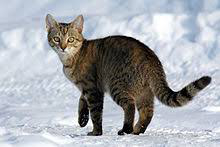

In [171]:
x=PredPic(test)
x.show()

In [172]:
x.result()

,label,prob
0,cougar,32.12%
1,lynx,29.34%
2,grey_fox,8.320%
3,red_wolf,8.160%
4,coyote,7.070%
5,timber_wolf,5.780%
6,Arctic_fox,1.430%
7,red_fox,1.180%
8,dhole,0.900%
9,tiger,0.610%


In [189]:
a=PredPic('https://www.alleycat.org/wp-content/uploads/2016/06/Facebook_Link_KittenProgression.jpg')
a.show()

HTTPError: HTTP Error 403: Forbidden

In [190]:
a.result()

,label,prob
0,Persian_cat,67.06%
1,tabby,8.750%
2,lynx,8.380%
3,Egyptian_cat,7.910%
4,tiger_cat,1.870%
5,lens_cap,0.470%
6,ping-pong_ball,0.330%
7,carton,0.210%
8,Pomeranian,0.180%
9,running_shoe,0.170%
